In [1]:
import numpy as np 
import pandas as pd 
import re
from sklearn.utils import resample
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/dell/Desktop/Dissertation/Google Play Store Apps Reviews (+110K Comment)/Reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app_Id
0,gp:AOqpTOHfSfVMoxl5cmq9kUks-tT3nXBdyWPRhKlms5M...,Laaonnoi Jaiyod,https://lh3.googleusercontent.com/a-/AOh14Gjrz...,Very laggy when chatting with latest version u...,1.0,0.0,10.3.1,2020-03-11 01:11:24,NaN,NaN,com.PepiPlay.KingsCastle
1,gp:AOqpTOHwTEuUGKuBJHgKtC60SVIAOUCWRNTlMPkIbmP...,Capp Farmer,https://lh3.googleusercontent.com/-1RlCo0f43Ko...,Its amazing....i like it very much...this app ...,5.0,2.0,NaN,2019-11-05 03:15:59,NaN,NaN,ginlemon.smartlauncher.extratool
2,gp:AOqpTOEb89oAwK_PlbgxA1rMHeYt9ntF76UuEhdPgjc...,Sandeep Sawant,https://lh3.googleusercontent.com/a-/AOh14Gi7R...,Good one,4.0,0.0,1.4.6,2018-08-28 18:19:49,NaN,NaN,tv.twitch.android.app
3,gp:AOqpTOFogWYVbXl8ZeE7K3YoN_sDWRr20jOO16Oarlk...,Tomas Šakalys,https://lh3.googleusercontent.com/a-/AOh14GjWU...,The only app that worked for my 2004 Renaul Cl...,5.0,1.0,1.41.7,2019-12-06 17:14:08,NaN,NaN,homeworkout.homeworkouts.noequipment
4,gp:AOqpTOFxlcucPGyAhbpEZH676xCB-px8kHoTWP3BY-2...,Michael,https://lh3.googleusercontent.com/a-/AOh14Gibm...,I like the start up and instant on.,5.0,0.0,2.3,2016-10-21 15:35:18,NaN,NaN,com.houzz.app


# Data exploration

In [3]:
df.shape

(114344, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114344 entries, 0 to 114343
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reviewId              114344 non-null  object 
 1   userName              114344 non-null  object 
 2   userImage             114344 non-null  object 
 3   content               114301 non-null  object 
 4   score                 114344 non-null  float64
 5   thumbsUpCount         114344 non-null  float64
 6   reviewCreatedVersion  99946 non-null   object 
 7   at                    114344 non-null  object 
 8   replyContent          16104 non-null   object 
 9   repliedAt             16104 non-null   object 
 10  app_Id                114344 non-null  object 
dtypes: float64(2), object(9)
memory usage: 9.6+ MB


In [5]:
print(df.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                    43
score                       0
thumbsUpCount               0
reviewCreatedVersion    14398
at                          0
replyContent            98240
repliedAt               98240
app_Id                      0
dtype: int64


In [6]:
df = df.dropna(how='any', subset=['content'])

In [7]:
print(df.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    14393
at                          0
replyContent            98197
repliedAt               98197
app_Id                      0
dtype: int64


In [8]:
df = df.dropna(how='any', subset=['reviewCreatedVersion'])

In [9]:
print(df.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion        0
at                          0
replyContent            86307
repliedAt               86307
app_Id                      0
dtype: int64


In [10]:
df.drop(["replyContent", "repliedAt"], axis = 1, inplace = True)

In [11]:
print(df.isnull().sum())

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
app_Id                  0
dtype: int64


In [12]:
df.shape

(99908, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99908 entries, 0 to 114343
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              99908 non-null  object 
 1   userName              99908 non-null  object 
 2   userImage             99908 non-null  object 
 3   content               99908 non-null  object 
 4   score                 99908 non-null  float64
 5   thumbsUpCount         99908 non-null  float64
 6   reviewCreatedVersion  99908 non-null  object 
 7   at                    99908 non-null  object 
 8   app_Id                99908 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [14]:
corr = df.corr()
corr

,score,thumbsUpCount
score,1.000000,-0.044444
thumbsUpCount,-0.044444,1.000000


In [15]:
df["content"] = df["content"].str.encode('utf-8')

Text(0.5, 0, 'review score')

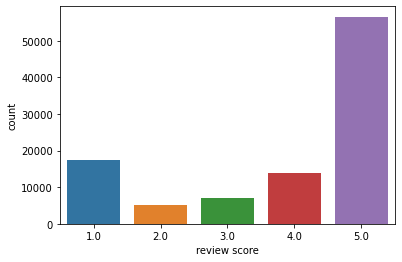

In [16]:
sns.countplot(df.score)
plt.xlabel("review score")

In [17]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

In [18]:
df['sentiment'] = df.score.apply(to_sentiment)

In [19]:
category_names = ['negative', 'neutral', 'positive']

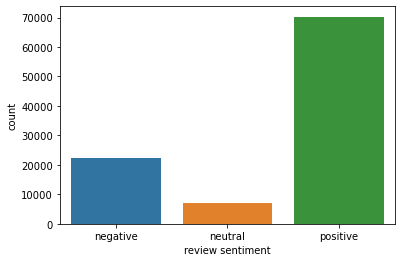

In [20]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(category_names);

In [21]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,app_Id,sentiment
0,gp:AOqpTOHfSfVMoxl5cmq9kUks-tT3nXBdyWPRhKlms5M...,Laaonnoi Jaiyod,https://lh3.googleusercontent.com/a-/AOh14Gjrz...,b'Very laggy when chatting with latest version...,1.0,0.0,10.3.1,2020-03-11 01:11:24,com.PepiPlay.KingsCastle,0
2,gp:AOqpTOEb89oAwK_PlbgxA1rMHeYt9ntF76UuEhdPgjc...,Sandeep Sawant,https://lh3.googleusercontent.com/a-/AOh14Gi7R...,b'Good one',4.0,0.0,1.4.6,2018-08-28 18:19:49,tv.twitch.android.app,2
3,gp:AOqpTOFogWYVbXl8ZeE7K3YoN_sDWRr20jOO16Oarlk...,Tomas Šakalys,https://lh3.googleusercontent.com/a-/AOh14GjWU...,b'The only app that worked for my 2004 Renaul ...,5.0,1.0,1.41.7,2019-12-06 17:14:08,homeworkout.homeworkouts.noequipment,2
4,gp:AOqpTOFxlcucPGyAhbpEZH676xCB-px8kHoTWP3BY-2...,Michael,https://lh3.googleusercontent.com/a-/AOh14Gibm...,b'I like the start up and instant on.',5.0,0.0,2.3,2016-10-21 15:35:18,com.houzz.app,2
6,gp:AOqpTOGwaBy2vnCEI463lazZf-kXJD7yglqpRTKRhWq...,Keya Kibria,https://lh3.googleusercontent.com/a-/AOh14GgsH...,b'Excellent app. Just love it \xf0\x9f\x98\x8d',5.0,0.0,5.63.2,2020-03-28 15:17:45,com.boranuonline.idates,2
...,...,...,...,...,...,...,...,...,...,...
114337,gp:AOqpTOHFAntFa1nPTLtlpCTOWUvjtiRKh5AqiUYO7SI...,Prem Raj,https://lh3.googleusercontent.com/a-/AOh14GgRO...,b'Best app All in one \xe2\xad\x90\xe2\xad\x90...,5.0,0.0,5.20.0.20022010,2020-04-07 09:57:36,com.eventbrite.attendee,2
114338,gp:AOqpTOFZSJosuOBOgtK8hvE5YQzsBmyauGNyXs6cHEO...,ALL Gamers Channel,https://lh3.googleusercontent.com/-Rf96pAu1cRc...,b'Best quality I experienced',5.0,0.0,1.84.0.1,2020-04-21 03:31:28,com.glow.android.baby,2
114339,gp:AOqpTOGhvk-AhQwQX6lZWzzqLKqdT8VWM7ri5pE1ZDe...,Superboy,https://lh3.googleusercontent.com/a-/AOh14Ggqb...,"b""It's so great and easy to understand.""",5.0,0.0,6.1.0,2020-05-11 04:19:06,air.com.rosettastone.mobile.CoursePlayer,2
114342,gp:AOqpTOEKHf8Si9Sd6kR3lkIyYR2_IQibPdWnFAslEnP...,Yuka Chan,https://lh3.googleusercontent.com/a-/AOh14GhhV...,"b""I love the cute animal sticker packs, reacti...",5.0,18.0,262.2.0.26.120,2020-05-05 05:56:33,com.audioaddict.di,2


In [22]:
df.shape

(99908, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99908 entries, 0 to 114343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              99908 non-null  object 
 1   userName              99908 non-null  object 
 2   userImage             99908 non-null  object 
 3   content               99908 non-null  object 
 4   score                 99908 non-null  float64
 5   thumbsUpCount         99908 non-null  float64
 6   reviewCreatedVersion  99908 non-null  object 
 7   at                    99908 non-null  object 
 8   app_Id                99908 non-null  object 
 9   sentiment             99908 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 10.9+ MB


In [45]:
print(df['app_Id'].nunique())

153


In [58]:
df.app_Id.value_counts()

com.advasoft.touchretouch               750
ru.ok.messages                          750
com.doodlejoy.studio.kaleidoo           750
com.dualboot.apps.ocean                 750
com.tiim.tradinggame                    750
                                       ... 
com.google.android.inputmethod.latin    376
com.pomelogames.MarsGame                345
com.google.android.apps.magazines       344
com.specialyg.ippro                     180
com.nexon.kart                          105
Name: app_Id, Length: 153, dtype: int64

<AxesSubplot:xlabel='app_Id'>

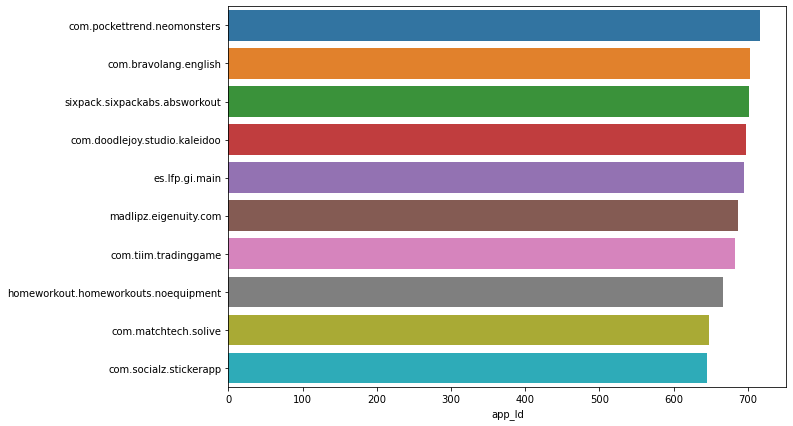

In [63]:
## Best App
plt.figure(figsize=(10,7))
best_app = df.app_Id[df['sentiment'] == 2].value_counts().head(10)
sns.barplot(x=best_app, y=best_app.index, data=df)

<AxesSubplot:xlabel='app_Id'>

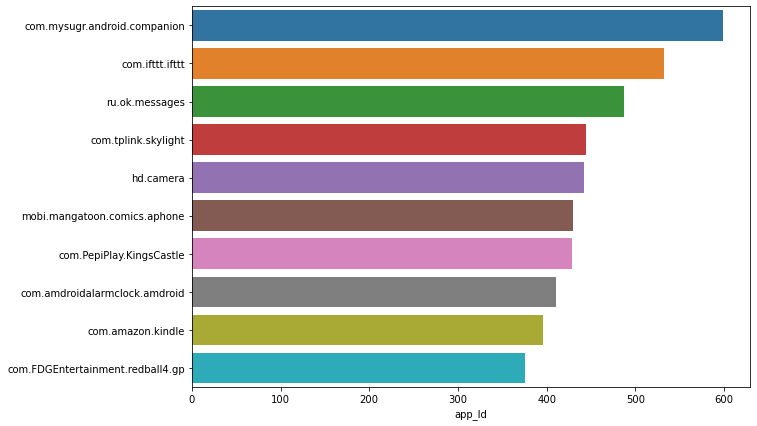

In [64]:
## Worst App
plt.figure(figsize=(10,7))
worst_app = df.app_Id[df['sentiment'] == 0].value_counts().head(10)
sns.barplot(x=worst_app, y=worst_app.index, data=df)

# Data preprocessing

In [23]:
features = df.iloc[:, 3].values
labels = df.iloc[:, -1].values

In [24]:
import re

In [25]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [26]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

text_classifier1 = LogisticRegression(random_state=0, multi_class='multinomial')
text_classifier1.fit(X_train, Y_train)

C:\Users\dell\.conda\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [29]:
pred1 = text_classifier1.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,pred1))
print(classification_report(Y_test,pred1))
print(accuracy_score(Y_test, pred1))

[[ 3428    46  1096]
 [  590    40   849]
 [  599    60 13274]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      4570
           1       0.27      0.03      0.05      1479
           2       0.87      0.95      0.91     13933

    accuracy                           0.84     19982
   macro avg       0.63      0.58      0.57     19982
weighted avg       0.80      0.84      0.81     19982

0.8378540686617956


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

text_classifier2 = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier2.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [34]:
pred2 = text_classifier2.predict(X_test)

In [35]:
print(confusion_matrix(Y_test,pred2))
print(classification_report(Y_test,pred2))
print(accuracy_score(Y_test, pred2))

[[ 3401    15  1154]
 [  633     8   838]
 [  809    25 13099]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4570
           1       0.17      0.01      0.01      1479
           2       0.87      0.94      0.90     13933

    accuracy                           0.83     19982
   macro avg       0.58      0.56      0.55     19982
weighted avg       0.78      0.83      0.80     19982

0.8261435291762587


# Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB

text_classifier3 = MultinomialNB()
text_classifier3.fit(X_train, Y_train)

MultinomialNB()

In [60]:
pred3 = text_classifier3.predict(X_test)

In [61]:
print(confusion_matrix(Y_test,pred3))
print(classification_report(Y_test,pred3))
print(accuracy_score(Y_test, pred3))

[[ 3213     0  1357]
 [  568     6   905]
 [  606     4 13323]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      4570
           1       0.60      0.00      0.01      1479
           2       0.85      0.96      0.90     13933

    accuracy                           0.83     19982
   macro avg       0.73      0.55      0.54     19982
weighted avg       0.81      0.83      0.79     19982

0.827845060554499


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

text_classifier4 = KNeighborsClassifier(n_neighbors=5)
text_classifier4.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
pred4 = text_classifier4.predict(X_test)

In [41]:
print(confusion_matrix(Y_test,pred4))
print(classification_report(Y_test,pred4))
print(accuracy_score(Y_test, pred4))

[[  980    48  3542]
 [  166    38  1275]
 [  349    95 13489]]
              precision    recall  f1-score   support

           0       0.66      0.21      0.32      4570
           1       0.21      0.03      0.05      1479
           2       0.74      0.97      0.84     13933

    accuracy                           0.73     19982
   macro avg       0.53      0.40      0.40     19982
weighted avg       0.68      0.73      0.66     19982

0.7260034030627565


# SVM

In [42]:
from sklearn.svm import SVC

#from sklearn.svm import LinearSVC
#text_classifier5 = LinearSVC()

text_classifier5 = SVC(kernel='linear')
text_classifier5.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
pred5 = text_classifier5.predict(X_test)

In [44]:
print(confusion_matrix(Y_test,pred5))
print(classification_report(Y_test,pred5))
print(accuracy_score(Y_test, pred5))

[[ 3480     2  1088]
 [  633     0   846]
 [  655     4 13274]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      4570
           1       0.00      0.00      0.00      1479
           2       0.87      0.95      0.91     13933

    accuracy                           0.84     19982
   macro avg       0.53      0.57      0.55     19982
weighted avg       0.78      0.84      0.81     19982

0.8384546091482334


In [47]:
!pip install xgboost

In [55]:
from xgboost import XGBClassifier as xgb

text_classifier6 = XGBClassifier(n_estimators=150, seed=123)
text_classifier6.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=123, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
pred6 = text_classifier6.predict(X_test)

In [57]:
print(confusion_matrix(Y_test,pred6))
print(classification_report(Y_test,pred6))
print(accuracy_score(Y_test, pred6))
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[ 3122    45  1403]
 [  504    25   950]
 [  524    40 13369]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      4570
           1       0.23      0.02      0.03      1479
           2       0.85      0.96      0.90     13933

    accuracy                           0.83     19982
   macro avg       0.61      0.55      0.55     19982
weighted avg       0.78      0.83      0.79     19982

0.8265438895005505
